Looking at the samples from https://ui.adsabs.harvard.edu/abs/2021arXiv210306892I/abstract to see if there's potential for a project looking at TESS data for the stars.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii

import astropy.units as u

import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/5tb_storage1/pceb_gold/'

In [8]:
ls /media/david/5tb_storage1/pceb_gold/

CV_appendix.csv*        DWD_appendix.csv*                WD+AFGK_appendix.csv*
CV_qfail_appendix.csv*  stab753_supplemental_files.zip*  WD+M_appendix.csv*


In [11]:
wddm = Table.read('{}WD+M_appendix.csv'.format(path))
wddm.dtype.names

('name',
 'source_id',
 'references',
 'ra',
 'dec',
 'type',
 'teffwd',
 'logg',
 'porb',
 'sp',
 'parallax',
 'parallax_error',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_g_mean_mag_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_mag_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_mag_error',
 'l',
 'b',
 'ruwe',
 'r_est',
 'r_est_error',
 'galex_coverage',
 'objid',
 'fuv_mag',
 'fuv_magerr',
 'nuv_mag',
 'nuv_magerr')

In [24]:
len(wddm[wddm['porb']> 0])

73

In [29]:
mask = wddm['porb']> 0

In [32]:
no_p = wddm[~mask]
yes_p = wddm[mask]

(array([18.,  9., 10.,  8.,  4.,  1.,  4.,  2.,  1.,  4.,  1.,  1.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  1.698   ,   3.755284,   5.812568,   7.869852,   9.927136,
         11.98442 ,  14.041704,  16.098988,  18.156272,  20.213556,
         22.27084 ,  24.328124,  26.385408,  28.442692,  30.499976,
         32.55726 ,  34.614544,  36.671828,  38.729112,  40.786396,
         42.84368 ,  44.900964,  46.958248,  49.015532,  51.072816,
         53.1301  ,  55.187384,  57.244668,  59.301952,  61.359236,
         63.41652 ,  65.473804,  67.531088,  69.588372,  71.645656,
         73.70294 ,  75.760224,  77.817508,  79.874792,  81.932076,
         83.98936 ,  86.046644,  88.103928,  90.161212,  92.218496,
         94.27578 ,  96.333064,  98.390348, 100.447632, 102.504916,
        104.5622  ]),
 <BarContainer

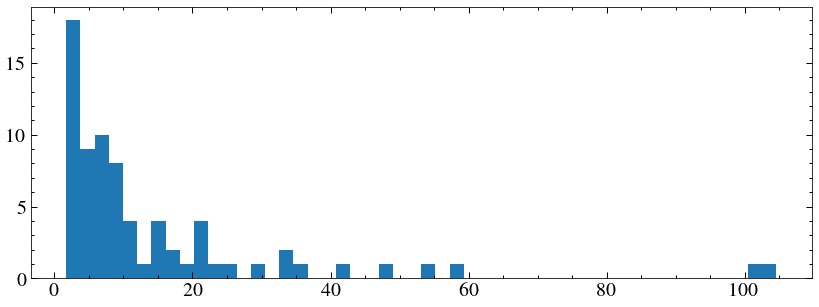

In [34]:
plt.hist(yes_p['porb'], bins =50)

16.410276465219994 16.73215484619141 1.6201052287097149
17.124330194984996 17.12503242492676 1.024579546524035


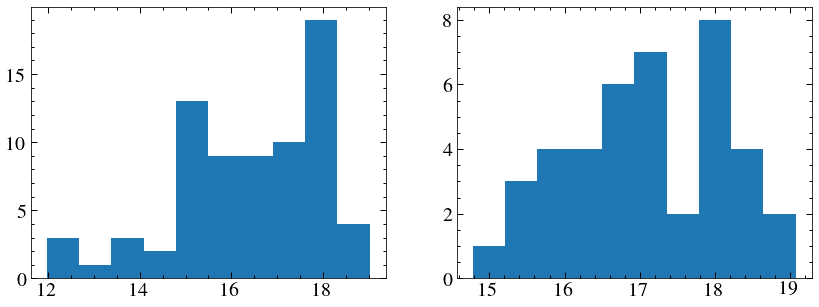

In [36]:
plt.subplot(121)
plt.hist(yes_p['phot_g_mean_mag'])
plt.subplot(122)
plt.hist(no_p['phot_g_mean_mag'])
for sample in (yes_p['phot_g_mean_mag'], no_p['phot_g_mean_mag']):
    print(np.mean(sample), np.median(sample), np.std(sample))